<h1>Data Science Project: Planning Stage (Individual)</h1>

In [1]:
library(tidyverse)

players_data <- read_csv("https://raw.githubusercontent.com/emmah47/dsci100-project/refs/heads/main/players.csv", show_col_types = FALSE)
session_data <- read_csv("https://raw.githubusercontent.com/emmah47/dsci100-project/refs/heads/main/sessions.csv", show_col_types = FALSE)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


<br><br>

<h2>1. Data Description</h2>

<h3>First, we take a look at the players data</h3>

In [2]:
head(players_data)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


<br>

Below we find some summary statistics and distribution information for variables inside the dataset:

In [3]:
summary(players_data)

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 8.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :20.52  
                                       3rd Qu.:22.00  
                                       Max.   :50.00  
                               

In [4]:
print("Player experience summary")
table(players_data$experience)

[1] "Player experience summary"



 Amateur Beginner      Pro  Regular  Veteran 
      63       35       14       36       48 

In [5]:
print("Player subscription summary")
table(players_data$subscribe)

[1] "Player subscription summary"



FALSE  TRUE 
   52   144 

In [6]:
print("Player gender summary")
table(players_data$gender)

[1] "Player gender summary"



          Agender            Female              Male        Non-binary 
                2                37               124                15 
            Other Prefer not to say      Two-Spirited 
                1                11                 6 

In [7]:
# finding rows with missing values
players_data[!complete.cases(players_data), ]

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Regular,TRUE,7d71c49cbbce8dcf0276b2bfecfa2d16f22cb31a4024556d6085884298f2ee8d,0.1,Devin,Two-Spirited,NA
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


### Number of Observations:
196

### Number of Variables:
7

### Summary of numerical features: 
**Type**: played_hours and Age has type <dbl>, which is a numeric value that can have decimal points. <br>
**Description**: played hours is the number of hours a player has played the game, age is the age of the player.
| Column       | Min      | 1st Qu.  | Median  | Mean    | 3rd Qu.  | Max     | NA Count |
|-------------|---------|----------|---------|--------|----------|---------|----------|
| played_hours | 0.000  | 0.000    | 0.100   | 5.846  | 0.600    | 223.100 | 0        |
| Age         | 8.00    | 17.00    | 19.00   | 20.52  | 22.00    | 50.00   | 2        |


### Summary of categorical features: 
**Experience Summary** <br>
**Type**: \<chr>, a string<br>
**Description**: the level of previous experience the player has.
| Category  | Count |
|-----------|-------|
| Amateur   | 63    |
| Beginner  | 35    |
| Pro       | 14    |
| Regular   | 36    |
| Veteran   | 48    |

**Subscription Summary**  <br>
**Type**: \<lgl>, true or false boolean value<br>
**Description**: true if the player has subscribed to a game-related newsletter, false if not/
| Subscribed | Count |
|------------|-------|
| FALSE      | 52    |
| TRUE       | 144   |

**Gender Summary**  <br>
**Type**:  \<chr>, a string<br>
**Description**: the player's gender.
| Gender               | Count |
|----------------------|-------|
| Agender             | 2     |
| Female              | 37    |
| Male                | 124   |
| Non-binary          | 15    |
| Other               | 1     |
| Prefer not to say   | 11    |
| Two-Spirited        | 6     |


### Issues with the data:
We have two observations that are missing the "age" feature. Another potential issue is that the dataset is very small (196 records), so it may be less representative of the entire population compared to if we had a larget dataset.

### How the data is collected:
When users decide to sign up, they are asked to fill out an anonymized form where they choose a name from a list of availible names and also their experience, gender, age, and email. I'm guessing the played_hours is probably just collected by the researchers logging connections to the server, or some similar method.

<br><br>

<h3>Now we can do the same analysis on session data:</h3>

In [8]:
head(session_data)

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In [9]:
summary(session_data)

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

In [10]:
# finding rows with missing values
session_data[!complete.cases(session_data), ]

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
55d24216db39c27e1f17cc43d3127cbf8ed76ada6d098202b53ded319855e2c1,27/08/2024 17:06,NA,1.72478e+12,NA
b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,15/09/2024 04:21,NA,1.72637e+12,NA


### Number of Observations:
1535

### Number of Variables:
5

### Summary of numerical features: 
**original_start_time**
**Type**: <dbl>, which is a numeric value that can have decimal points. <br>
**Description**:  session start time timestamps in milliseconds since the Unix epoch January 1, 1970 (UTC)
| Statistic  | Value        |
|------------|-------------|
| Min        | 1.712e+12   |
| 1st Quartile | 1.716e+12   |
| Median     | 1.719e+12   |
| Mean       | 1.719e+12   |
| 3rd Quartile | 1.722e+12   |
| Max        | 1.727e+12   |
| NA's       | 0          |


**original_end_time**
**Type**: <dbl>, which is a numeric value that can have decimal points. <br>
**Description**:  session end time timestamps in milliseconds since the Unix epoch January 1, 1970 (UTC)
| Statistic  | Value        |
|------------|-------------|
| Min        | 1.712e+12   |
| 1st Quartile | 1.716e+12   |
| Median     | 1.719e+12   |
| Mean       | 1.719e+12   |
| 3rd Quartile | 1.722e+12   |
| Max        | 1.727e+12   |
| NA's       | 2           |



### Issues with the data:
We have two observations that are missing the end_time and original_end_time feature. The data is also untidy, there are both dates (with day, month, year) and times in the start_time and end_time which should be seperated.

### How the data is collected:
This data is collected by recording user's play session lengths.

<br><br>

<h2>2. Questions</h2>

**Broad question**: Question 1: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

**Specific question**: Can experience, played_hours, gender, and age predict the subscribe variable (if a player subscribes to the newsletter or not) in players_data dataset?

This data will help me address my question since I will be able to analyze the relationships between the explanatory variable and the response variable using the data and various methods like linear regression or knn. I will first wrangle the data to impute any NA values by filling them in with the median.

<br><br>

<h2>3. Exploratory Data Analysis and Visualization</h2>

I do not think the sessions dataset will be useful to my predictions and I am not using any variables from that dataset in my question. Therefore, I will not be wrangling or exploring the second dataset in this section.

**Mean values for quantitative variables in players.csv:**

In [11]:
players_quantitative_data <- select(players_data, played_hours, Age)
summary(players_quantitative_data)

  played_hours          Age       
 Min.   :  0.000   Min.   : 8.00  
 1st Qu.:  0.000   1st Qu.:17.00  
 Median :  0.100   Median :19.00  
 Mean   :  5.846   Mean   :20.52  
 3rd Qu.:  0.600   3rd Qu.:22.00  
 Max.   :223.100   Max.   :50.00  
                   NA's   :2      

**Mean values of quantitative variables in players.csv dataset:**

| Column       | Mean    | 
|-------------|---------|
| played_hours | 5.846  | 
| Age         | 20.52  |

<br>

<h3>Visualizations</h3>

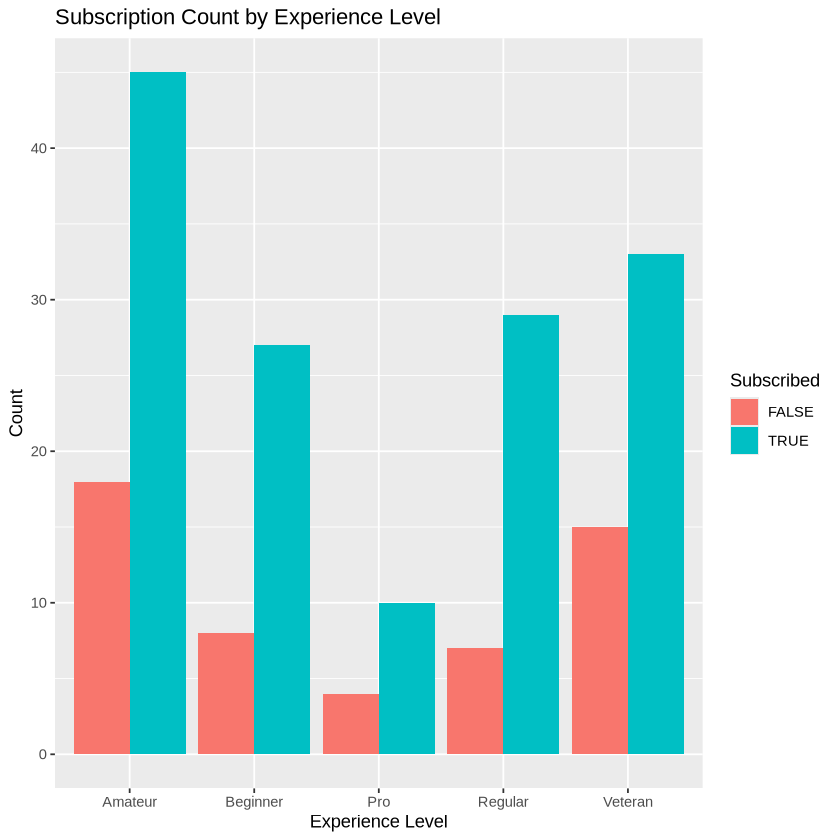

In [12]:
ggplot(players_data, aes(x = experience, fill = as.factor(subscribe))) +
  geom_bar(position = "dodge") +
  labs(title = "Subscription Count by Experience Level",
       x = "Experience Level",
       y = "Count",
       fill = "Subscribed")

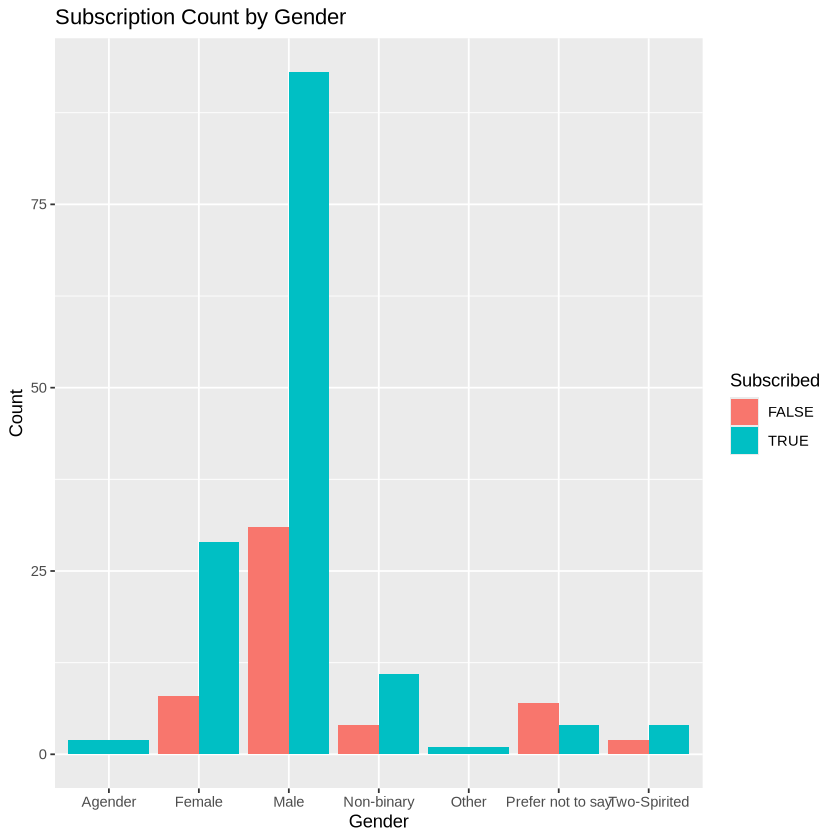

In [13]:
ggplot(players_data, aes(x = gender, fill = as.factor(subscribe))) +
  geom_bar(position = "dodge") +
  labs(title = "Subscription Count by Gender",
       x = "Gender",
       y = "Count",
       fill = "Subscribed")

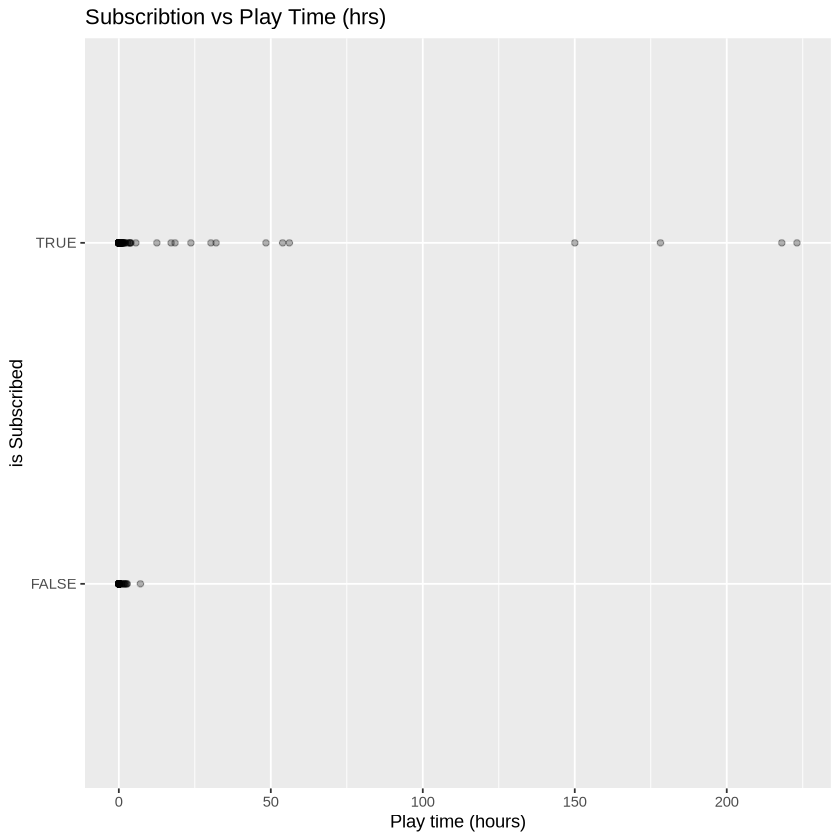

In [14]:
played_hours_scatterplot <- ggplot(players_data, aes(x = played_hours, y = subscribe)) +
	geom_point(alpha = 0.3) + 
	labs(title = "Subscribtion vs Play Time (hrs)",
       x = "Play time (hours)",
       y = "is Subscribed") 

played_hours_scatterplot

<br><br>

<h2>4. Methods and Plan</h2>

<h3>Proposed Method: K-Nearest-Neighbors (KNN)</h3>

**I will use KNN because:**
- it doesn't require the relationship between variables to be linear unlike linear/logistic regression
- It works well when the dimensionality of the data isn't high

**Assumptions:**
- data is sufficiently large enough for KNN to have enough neighbors to compare a new data point to
- data will be scaled (this will be done in the next part of the project)
- no irrelevant features (this will skew distance calculation)

**Weaknesses:**
- irrelevant features can skew prediction
- highly unbalanced dataset can skew prediction
- less interpretable compared to linear models

**Model selection and cross val**
- I will first split the data to 80% training 20% test because the dataset is small so I would like more data points for training.
- I will do cross validation with the training and validation set in order to find the best hyperparameter k.
- I will use the best k in my final KNN model.
